# Import Module

In [14]:
# import tf & keras module
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

# Load Dataset

In [3]:
# extract dataset
import zipfile
from zipfile import ZipFile

with ZipFile("data_baru_rev (2).zip", "r") as zipObj:
    zipObj.extractall()
zipObj.close()

In [8]:
# define parameter
class C:
    TRAIN_DIR = "data_baru_rev/latih"
    TEST_DIR = "data_baru_rev/test"
    BATCH_SIZE = 32
    EPOCHS = 30

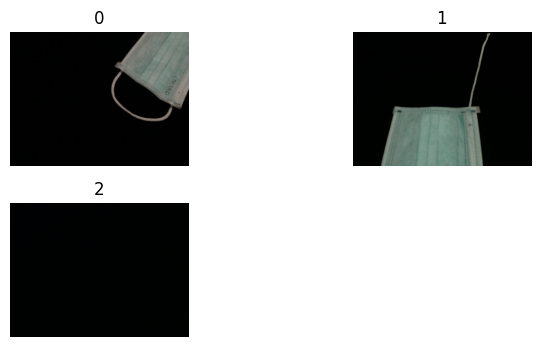

In [17]:
# figure some dataset
class_names = sorted(os.listdir(C.TRAIN_DIR))

# Plot some sample images from the data train
plt.figure(figsize=(7, 7))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(C.TRAIN_DIR, class_name)
    image_path = os.path.join(class_dir, os.listdir(class_dir)[6])
    image = plt.imread(image_path)

    plt.subplot(4, 2, i+1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Preprocessing

In [18]:
from keras.preprocessing.image import ImageDataGenerator

def generators(train_dir, val_dir):
    """
    function for preprocessing image
    """
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       rotation_range=40,
                                       zoom_range=0.2,
                                       fill_mode='nearest')
    
    validation_datagen = ImageDataGenerator(rescale=1./255.)

    training_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                           batch_size=C.BATCH_SIZE,
                                                           target_size=(150,150),
                                                           class_mode='categorical')
    
    validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                  batch_size=C.BATCH_SIZE,
                                                                  target_size=(150,150),
                                                                  class_mode='categorical')
    
    return training_generator, validation_generator

In [19]:
training_generator, validation_generator = generators(C.TRAIN_DIR, C.TEST_DIR)

Found 1676 images belonging to 3 classes.
Found 420 images belonging to 3 classes.


# Model

In [20]:
from keras import Sequential
from keras.layers import Flatten,Dense,Conv2D,GlobalAveragePooling2D,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [21]:
model = Sequential([
    # first
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    AveragePooling2D(2,2),
    # second
    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D(2,2),
    # third
    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D(2,2),
    # fourth
    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D(2,2),
    # fifth
    Conv2D(128, (3,3), activation='relu'),
    AveragePooling2D(2,2),
    # global average
    GlobalAveragePooling2D(),
    # dense 256
    Dense(256, activation='relu'),
    # output layer
    Dense(3, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 average_pooling2d (AverageP  (None, 74, 74, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 36, 36, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 average_pooling2d_2 (Averag  (None, 17, 17, 64)       0

In [24]:
# compile model
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

# Callback

In [46]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\nSTOOOOOOOOOOOPPP")
            self.model.stop_training = True

In [47]:
callbacks = myCallback()

In [49]:
history = model.fit(training_generator,
                    validation_data=validation_generator,
                    epochs=C.EPOCHS,
                    batch_size=C.BATCH_SIZE,
                    verbose=2,
                    callbacks=callbacks)

Epoch 1/30
53/53 - 145s - loss: 0.2757 - accuracy: 0.8807 - val_loss: 0.4571 - val_accuracy: 0.8048 - 145s/epoch - 3s/step
Epoch 2/30
53/53 - 149s - loss: 0.2455 - accuracy: 0.8980 - val_loss: 0.4997 - val_accuracy: 0.7833 - 149s/epoch - 3s/step
Epoch 3/30
53/53 - 148s - loss: 0.2465 - accuracy: 0.8884 - val_loss: 0.3446 - val_accuracy: 0.8238 - 148s/epoch - 3s/step
Epoch 4/30
53/53 - 153s - loss: 0.2052 - accuracy: 0.9135 - val_loss: 0.3273 - val_accuracy: 0.8667 - 153s/epoch - 3s/step
Epoch 5/30
53/53 - 167s - loss: 0.2037 - accuracy: 0.9129 - val_loss: 0.2973 - val_accuracy: 0.8619 - 167s/epoch - 3s/step
Epoch 6/30
53/53 - 151s - loss: 0.2240 - accuracy: 0.9045 - val_loss: 0.2610 - val_accuracy: 0.8786 - 151s/epoch - 3s/step
Epoch 7/30
53/53 - 148s - loss: 0.2171 - accuracy: 0.9105 - val_loss: 0.3516 - val_accuracy: 0.8452 - 148s/epoch - 3s/step
Epoch 8/30
53/53 - 146s - loss: 0.1878 - accuracy: 0.9260 - val_loss: 0.2697 - val_accuracy: 0.8619 - 146s/epoch - 3s/step
Epoch 9/30
53/53

# Plot Result

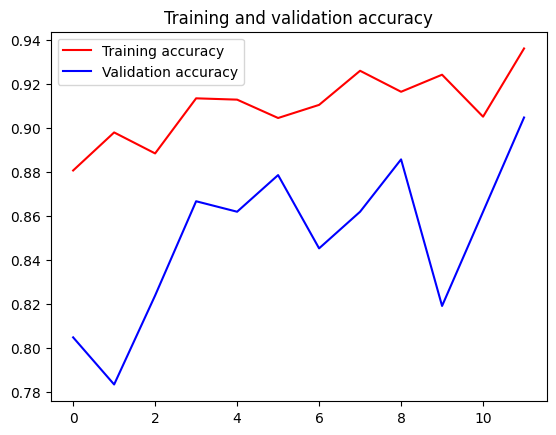

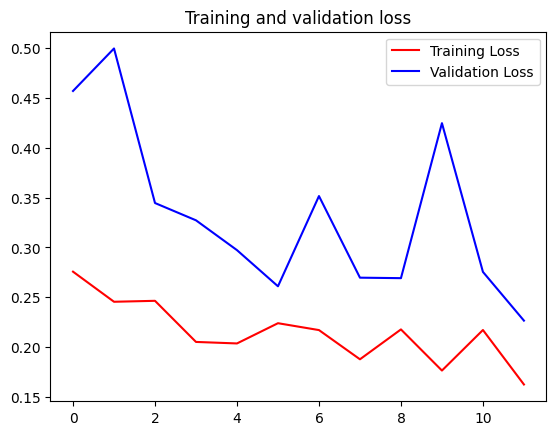

In [50]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
# save the model
export_dir = 'model'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [55]:
model.save("model.h5")